# 0) Setting Environment

In [46]:
!pip install geopy pycountry

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:00:01
   --------- ----------------------------- 30.7/125.4 kB 262.6 kB/s eta 0:

In [47]:
import pandas as pd
from geopy.geocoders import Nominatim
import pycountry
import time

# Sample data with country codes
data = {
    "country_code": ["PK", "IND", "USA", "UK", "AUS"],
    "employee_count": [50, 120, 200, 80, 30]
}

df = pd.DataFrame(data)

# Function to get country name from code
def get_country_name(code):
    try:
        if code == "UK":  # pycountry doesn't recognize "UK"
            return "United Kingdom"
        return pycountry.countries.get(alpha_3=code).name if len(code) == 3 else pycountry.countries.get(alpha_2=code).name
    except:
        return None

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Fetch lat and lon
latitudes = []
longitudes = []

for code in df['country_code']:
    country_name = get_country_name(code)
    if country_name:
        try:
            location = geolocator.geocode(country_name)
            if location:
                latitudes.append(location.latitude)
                longitudes.append(location.longitude)
            else:
                latitudes.append(None)
                longitudes.append(None)
        except Exception as e:
            print(f"Error with {country_name}: {e}")
            latitudes.append(None)
            longitudes.append(None)
    else:
        latitudes.append(None)
        longitudes.append(None)
    
    time.sleep(1)  # To avoid overloading the API

# Add to dataframe
df['latitude'] = latitudes
df['longitude'] = longitudes
df

Error with Pakistan: Non-successful status code 403
Error with India: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=India&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error with United States: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=United+States&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error with United Kingdom: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=United+Kingdom&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error with Australia: Non-successful status code 503


,country_code,employee_count,latitude,longitude
0,PK,50,None,None
1,IND,120,None,None
2,USA,200,None,None
3,UK,80,None,None
4,AUS,30,None,None


In [3]:
# # Installing Required Modules
# !pip install nltk
# !pip install textstat
# !pip install gensim
# !pip install scipy==1.11.1

In [4]:
import nltk
import string
import gensim
import textstat
import numpy as np
import pandas as pd
from nltk import pos_tag
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.decomposition import TruncatedSVD
from gensim.models import LdaModel, LsiModel, Doc2Vec
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ATAUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ATAUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ATAUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 1) Loading Data

In [7]:
# Reading Files
train_data = pd.read_csv("../Data/Raw/training_set_rel3.tsv", sep="\t", encoding='ISO-8859-1')

In [8]:
# Dropping Irrelavant Columns
columns_to_keep = ['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
                   'domain1_score']

train_data = train_data[columns_to_keep]

In [9]:
train_data.head(8)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8
5,6,1,"Dear @LOCATION1, I think that computers have a...",4,4,8
6,7,1,Did you know that more and more people these d...,5,5,10
7,8,1,@PERCENT1 of people agree that computers make ...,5,5,10


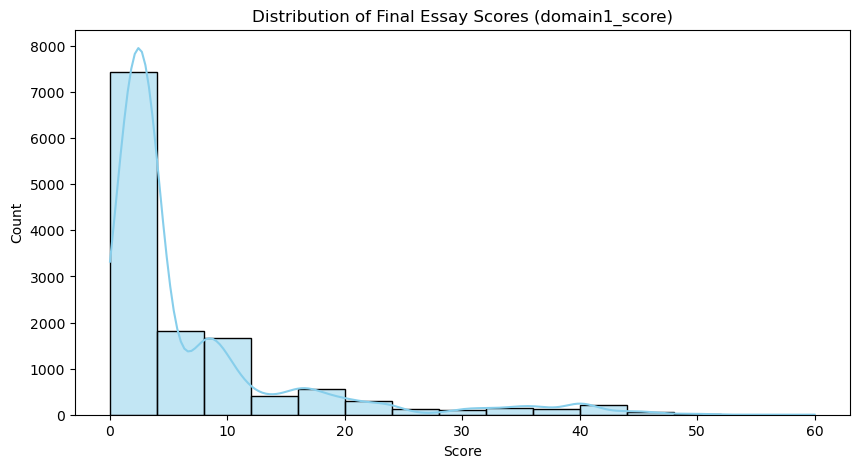

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(train_data['domain1_score'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Final Essay Scores (domain1_score)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

C:\Users\ATAUMAR\AppData\Local\Temp\ipykernel_1596\368737477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='essay_set', data=train_data, palette='coolwarm')


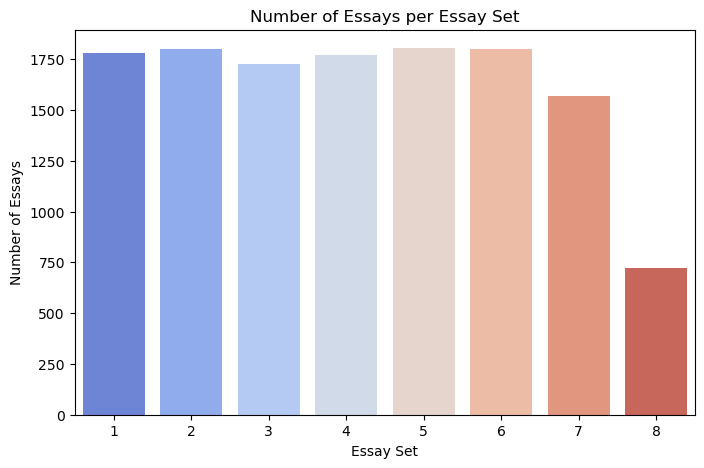

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='essay_set', data=train_data, palette='coolwarm')
plt.title('Number of Essays per Essay Set')
plt.xlabel('Essay Set')
plt.ylabel('Number of Essays')
plt.show()

# 2) Feature Engineering

## 2.1) Vocabulary-level features

### 2.1.1) Length Based Features

In [15]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))

def length_based_features(text):
    # Tokenize the text into sentences and words using string operations
    sentences = text.split('.')
    words = text.split()

    # Calculate word and sentence counts
    word_count = len(words)
    sentence_count = len(sentences)

    # Calculate average word and sentence lengths
    avg_word_length = sum(len(word) for word in words) / word_count if word_count else 0
    avg_sentence_length = word_count / sentence_count if sentence_count else 0

    # Calculate counts of long and short words
    long_word_threshold = 6 
    short_word_threshold = 4
    long_word_count = sum(1 for word in words if len(word) > long_word_threshold)
    short_word_count = sum(1 for word in words if len(word) < short_word_threshold)

    # Calculate unique token count and nostop count
    unique_tokens = set(words)
    nostop_words = [word for word in words if word.lower() not in set(stopwords.words('english'))]
    nostop_count = len(nostop_words)
    unique_token_count = len(unique_tokens)

    # Compile features into a dictionary
    features = {
        'word_count': word_count,
        'unique_token_count': unique_token_count,
        'nostop_count': nostop_count,
        'avg_sentence_length': avg_sentence_length,
        'avg_word_length': avg_word_length,
        'sentence_count': sentence_count,
        'long_word_count': long_word_count,
        'short_word_count': short_word_count
    }

    return features


# Applying Function and Extracting Features
train_data['length_features'] = train_data['essay'].apply(length_based_features)
train_data[['word_count', 'unique_token_count', 'nostop_count', 'avg_sentence_length', 'avg_word_length', 'sentence_count', 'long_word_count', 'short_word_count']] = train_data['length_features'].apply(pd.Series)
train_data[['word_count', 'unique_token_count', 'nostop_count', 'avg_sentence_length', 'avg_word_length', 'sentence_count', 'long_word_count', 'short_word_count']].head()

,word_count,unique_token_count,nostop_count,avg_sentence_length,avg_word_length,sentence_count,long_word_count,short_word_count
0,338.0,184.0,170.0,30.727273,4.550296,11.0,67.0,138.0
1,419.0,216.0,230.0,22.052632,4.463007,19.0,86.0,169.0
2,279.0,167.0,139.0,18.600000,4.526882,15.0,56.0,119.0
3,524.0,275.0,302.0,20.960000,5.041985,25.0,140.0,182.0
4,465.0,226.0,229.0,15.000000,4.526882,31.0,95.0,192.0


### 2.1.2) Part of Speech Features

In [17]:
def calculate_pos_features(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_counts = Counter(tag for word, tag in pos_tags)

    # Simplify POS tags to match the examples given
    pos_features = {
        'noun': pos_counts['NN'] + pos_counts['NNS'],
        'adj': pos_counts['JJ'],
        'pron': pos_counts['PRP'] + pos_counts['PRP$'],
        'verb': pos_counts['VB'] + pos_counts['VBD'] + pos_counts['VBG'] + pos_counts['VBN'] + pos_counts['VBP'] + pos_counts['VBZ'],
        'cconj': pos_counts['CC'],
        'adv': pos_counts['RB'],
        'det': pos_counts['DT'],
        'propn': pos_counts['NNP'] + pos_counts['NNPS'],
        'num': pos_counts['CD'],
        'intj': pos_counts['UH'],
        # 'ner count' is not possible to calculate with just POS tags. It requires Named Entity Recognition (NER)
    }

    return pos_features

# Applying Function and Extracting Features
train_data['pos_features'] = train_data['essay'].apply(calculate_pos_features)
train_data[['noun', 'adj', 'pron', 'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'intj']] = train_data['pos_features'].apply(pd.Series)
train_data[['noun', 'adj', 'pron', 'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'intj']].head()

,noun,adj,pron,verb,cconj,adv,det,propn,num,intj
0,72,20,41,68,14,21,20,12,0,0
1,96,19,42,85,18,17,35,18,4,0
2,72,15,16,53,17,11,27,14,2,0
3,126,42,23,100,18,26,43,71,0,0
4,107,23,28,87,15,34,54,9,5,0


### 2.1.3) Punctuation Features


In [19]:
# Function to calculate punctuation-based features
def punctuation_features(text):
    # Count occurrences of each punctuation mark
    period_count = text.count('.')
    comma_count = text.count(',')
    question_mark_count = text.count('?')
    exclamation_mark_count = text.count('!')
    quotation_mark_count = text.count('"') + text.count("'")  # Counting both double and single quotes
    colon_count = text.count(':')
    semicolon_count = text.count(';')
    parentheses_count = text.count('(') + text.count(')')  # Each '(' has a matching ')'
    hyphen_count = text.count('-')
    ellipsis_count = text.count('...')  # Treating ellipsis as a sequence of three periods

    # Compiling features into a dictionary
    features = {
        'period_count': period_count,
        'comma_count': comma_count,
        'question_mark_count': question_mark_count,
        'exclamation_mark_count': exclamation_mark_count,
        'colon_count': colon_count,
        'semicolon_count': semicolon_count,
        'parentheses_count': parentheses_count // 2,  # Dividing by 2 to count pairs
        'hyphen_count': hyphen_count,
        'ellipsis_count': ellipsis_count
    }

    return features

# Applying Function and Extracting Features
train_data['punctuation_features'] = train_data['essay'].apply(punctuation_features)
train_data[['period_count', 'comma_count', 'question_mark_count', 'exclamation_mark_count', 'colon_count', 'semicolon_count', 'parentheses_count', 'hyphen_count', 'ellipsis_count']] = train_data['punctuation_features'].apply(pd.Series)
train_data[['period_count', 'comma_count', 'question_mark_count', 'exclamation_mark_count', 'colon_count', 'semicolon_count', 'parentheses_count', 'hyphen_count', 'ellipsis_count']].head()

,period_count,comma_count,question_mark_count,exclamation_mark_count,colon_count,semicolon_count,parentheses_count,hyphen_count,ellipsis_count
0,10,18,2,4,1,0,1,2,0
1,18,12,1,1,0,0,0,1,0
2,14,9,0,0,0,0,0,0,0
3,24,13,1,2,0,0,0,3,0
4,30,13,0,0,0,0,0,2,0


In [20]:
vocab_level_features = ['word_count', 'unique_token_count', 'nostop_count', 'avg_sentence_length', 'avg_word_length', 'sentence_count', 'long_word_count', 'short_word_count', 'noun', 'adj', 'pron', 'verb', 'cconj', 'adv', 'det', 'propn', 'num', 'intj', 'period_count', 'comma_count', 'question_mark_count', 'exclamation_mark_count', 'colon_count', 'semicolon_count', 'parentheses_count', 'hyphen_count', 'ellipsis_count']
vocab_level_features_df = train_data[vocab_level_features]
vocab_level_features_df.to_csv("../Data/Features/vocab_level_features_df.csv", index=False)
vocab_level_features_df.head()

,word_count,unique_token_count,nostop_count,avg_sentence_length,avg_word_length,sentence_count,long_word_count,short_word_count,noun,adj,...,intj,period_count,comma_count,question_mark_count,exclamation_mark_count,colon_count,semicolon_count,parentheses_count,hyphen_count,ellipsis_count
0,338.0,184.0,170.0,30.727273,4.550296,11.0,67.0,138.0,72,20,...,0,10,18,2,4,1,0,1,2,0
1,419.0,216.0,230.0,22.052632,4.463007,19.0,86.0,169.0,96,19,...,0,18,12,1,1,0,0,0,1,0
2,279.0,167.0,139.0,18.600000,4.526882,15.0,56.0,119.0,72,15,...,0,14,9,0,0,0,0,0,0,0
3,524.0,275.0,302.0,20.960000,5.041985,25.0,140.0,182.0,126,42,...,0,24,13,1,2,0,0,0,3,0
4,465.0,226.0,229.0,15.000000,4.526882,31.0,95.0,192.0,107,23,...,0,30,13,0,0,0,0,0,2,0


## 2.2) Sentence Level Features

### 2.2.1) Readability Features

#### 2.2.1.1) Readability Grades

In [24]:
def readability_features(text):
    features = {
        'Kincaid': textstat.flesch_kincaid_grade(text),
        'ARI': textstat.automated_readability_index(text),
        'Coleman_Liau': textstat.coleman_liau_index(text),
        'LIX': textstat.lix(text),
        'Flesch_Reading_Ease': textstat.flesch_reading_ease(text),
        'Gunning_Fog': textstat.gunning_fog(text),
        'SMOG': textstat.smog_index(text),
        'RIX': textstat.rix(text),
        'Dale_Chall': textstat.dale_chall_readability_score(text)
    }
    return features

# Applying Function and Extracting Features
train_data['readability_features'] = train_data['essay'].apply(readability_features)
train_data[['Kincaid', 'ARI', 'Coleman_Liau', 'LIX', 'Flesch_Reading_Ease', 'Gunning_Fog', 'SMOG', 'RIX', 'Dale_Chall']] = train_data['readability_features'].apply(pd.Series)
train_data[['Kincaid', 'ARI', 'Coleman_Liau', 'LIX', 'Flesch_Reading_Ease', 'Gunning_Fog', 'SMOG', 'RIX', 'Dale_Chall']].head()

,Kincaid,ARI,Coleman_Liau,LIX,Flesch_Reading_Ease,Gunning_Fog,SMOG,RIX,Dale_Chall
0,9.7,11.3,8.54,42.32,65.56,10.42,10.7,3.93,7.00
1,9.1,10.1,7.95,41.53,67.08,10.31,11.8,4.10,7.28
2,9.9,9.9,8.30,39.97,59.74,10.54,12.3,3.79,7.62
3,10.9,12.0,10.97,46.12,51.78,10.97,12.4,4.89,8.34
4,8.2,7.7,8.00,35.93,64.20,8.01,11.1,2.93,6.51


#### 2.2.1.2) Sentence Information Features

In [26]:
def sentence_info_features(text):
    words = word_tokenize(text)
    syllables = textstat.syllable_count(text)
    long_words = sum(1 for word in words if len(word) > 6)
    sentences = sent_tokenize(text)
    paragraphs = text.split('\n')

    features = {
        'characters_word': sum(len(word) for word in words) / len(words) if words else 0,
        'syll_word': syllables / len(words) if words else 0,
        'wordtypes': len(set(words)),
        'words_sentence': len(words) / len(sentences) if sentences else 0,
        'words': len(words),
        'sentences': len(sentences),
        'sentences_paragraph': len(sentences) / len(paragraphs) if paragraphs else 0,
        'complex_words': textstat.difficult_words(text),
        'type_token_ratio': textstat.lexicon_count(text, removepunct=True) / len(words) if words else 0,
        'characters': sum(len(word) for word in words),
        'syllables': syllables,
        'paragraphs': len(paragraphs),
        'long_words': long_words,
        'complex_dc': textstat.dale_chall_readability_score(text)
    }
    return features

# Applying Function and Extracting Features
train_data['sentence_info_features'] = train_data['essay'].apply(sentence_info_features)
train_data[['characters_word', 'syll_word', 'wordtypes', 'words_sentence', 'words', 'sentences', 'sentences_paragraph', 'complex_words', 'type_token_ratio', 'characters', 'syllables', 'paragraphs', 'long_words', 'complex_dc']] = train_data['sentence_info_features'].apply(pd.Series)
train_data[['characters_word', 'syll_word', 'wordtypes', 'words_sentence', 'words', 'sentences', 'sentences_paragraph', 'complex_words', 'type_token_ratio', 'characters', 'syllables', 'paragraphs', 'long_words', 'complex_dc']].head()

,characters_word,syll_word,wordtypes,words_sentence,words,sentences,sentences_paragraph,complex_words,type_token_ratio,characters,syllables,paragraphs,long_words,complex_dc
0,3.984456,1.191710,181.0,24.125000,386.0,16.0,16.0,28.0,0.873057,1538.0,460.0,1.0,59.0,7.00
1,4.030172,1.297414,209.0,23.200000,464.0,20.0,20.0,52.0,0.903017,1870.0,602.0,1.0,81.0,7.28
2,4.035144,1.306709,161.0,22.357143,313.0,14.0,14.0,39.0,0.891374,1263.0,409.0,1.0,52.0,7.62
3,4.328969,1.353519,267.0,22.629630,611.0,27.0,27.0,101.0,0.857610,2645.0,827.0,1.0,131.0,8.34
4,4.071567,1.317215,211.0,17.233333,517.0,30.0,30.0,50.0,0.899420,2105.0,681.0,1.0,87.0,6.51


#### 2.2.1.3) Word Usage Features

In [28]:
def word_usage_features(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)

    pos_counts = Counter(tag for word, tag in tagged_words)

    features = {
        'tobeverb': pos_counts['VB'],
        'auxverb': pos_counts['MD'],
        'conjunction': pos_counts['CC'],
        'pronoun': pos_counts['PRP'] + pos_counts['PRP$'],
        'preposition': pos_counts['IN'],
        'nominalization': sum(1 for word, tag in tagged_words if tag.startswith('NN') and len(word) > 6)
    }
    return features

# Applying Function and Extracting Features
train_data['word_usage_features'] = train_data['essay'].apply(word_usage_features)
train_data[['tobeverb', 'auxverb', 'conjunction', 'pronoun', 'preposition', 'nominalization']] = train_data['word_usage_features'].apply(pd.Series)
train_data[['tobeverb', 'auxverb', 'conjunction', 'pronoun', 'preposition', 'nominalization']].head()

,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization
0,21,5,14,41,53,36
1,29,16,18,42,58,52
2,13,4,17,16,32,33
3,31,14,18,23,64,90
4,42,26,15,28,43,58


In [29]:
# Getting all Sent-level features
readability_features = ['Kincaid', 'ARI', 'Coleman_Liau', 'LIX', 'Flesch_Reading_Ease', 'Gunning_Fog', 'SMOG', 'RIX', 'Dale_Chall',
                               'characters_word', 'syll_word', 'wordtypes', 'words_sentence', 'words', 'sentences', 'sentences_paragraph',
                               'complex_words', 'type_token_ratio', 'characters', 'syllables', 'paragraphs', 'long_words', 'complex_dc',
                               'tobeverb', 'auxverb', 'conjunction', 'pronoun', 'preposition', 'nominalization']

readability_features_df = train_data[readability_features]
readability_features_df.to_csv("../Data/Features/readability_features_df.csv", index=False)
readability_features_df.head()

,Kincaid,ARI,Coleman_Liau,LIX,Flesch_Reading_Ease,Gunning_Fog,SMOG,RIX,Dale_Chall,characters_word,...,syllables,paragraphs,long_words,complex_dc,tobeverb,auxverb,conjunction,pronoun,preposition,nominalization
0,9.7,11.3,8.54,42.32,65.56,10.42,10.7,3.93,7.00,3.984456,...,460.0,1.0,59.0,7.00,21,5,14,41,53,36
1,9.1,10.1,7.95,41.53,67.08,10.31,11.8,4.10,7.28,4.030172,...,602.0,1.0,81.0,7.28,29,16,18,42,58,52
2,9.9,9.9,8.30,39.97,59.74,10.54,12.3,3.79,7.62,4.035144,...,409.0,1.0,52.0,7.62,13,4,17,16,32,33
3,10.9,12.0,10.97,46.12,51.78,10.97,12.4,4.89,8.34,4.328969,...,827.0,1.0,131.0,8.34,31,14,18,23,64,90
4,8.2,7.7,8.00,35.93,64.20,8.01,11.1,2.93,6.51,4.071567,...,681.0,1.0,87.0,6.51,42,26,15,28,43,58


### 2.2.2) Sentence Vector Representation

In [31]:
# Preprocessing text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    processed_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [w.lower() for w in words if w.isalpha() and w.lower() not in stop_words]
        if words:
            processed_sentences.append(words)
    return processed_sentences

all_sentences = []
for essay in train_data['essay']:
    all_sentences.extend(preprocess_text(essay))

In [32]:
# Training Word2Vec model
word2vec_model = Word2Vec(sentences=all_sentences,
                          vector_size=100,
                          window=5,
                          min_count=1,
                          workers=4)

In [33]:
# Generating Vectors
def essay_to_sentence_vectors(essay, model):
    processed_sentences = preprocess_text(essay)
    essay_sentence_vectors = []
    for sentence in processed_sentences:
        sentence_vector = np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0)
        if not np.isnan(sentence_vector).any():
            essay_sentence_vectors.append(sentence_vector)
    return essay_sentence_vectors

def essay_to_vector(essay, model):
    sentence_vectors = essay_to_sentence_vectors(essay, model)
    if sentence_vectors:  # Ensure there's at least one sentence vector
        essay_vector = np.mean(sentence_vectors, axis=0)
    else:
        essay_vector = np.zeros(model.vector_size)  # Fallback to a zero vector
    return essay_vector

# Converting essay to an overall vector
sentence_vectors = train_data['essay'].apply(lambda essay: essay_to_vector(essay, word2vec_model))
np.save('../Data/Features/sentence_vectors_representation.npy', sentence_vectors.to_numpy())

## 2.3) Chapter Level Features

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import LdaModel, LsiModel, Doc2Vec
import gensim

# Preprocessing text for LDA, LSA, and Doc2Vec
stop_words_set = set(stopwords.words('english'))
def clean_text(text):
    """
    Cleans and tokenizes text by removing stopwords and non-alphabetic characters.
    """
    return [token for token in word_tokenize(text.lower()) if token.isalpha() and token not in stop_words_set]

processed_essays = train_data['essay'].apply(clean_text)

# Creating a dictionary and corpus for topic modeling
dictionary = Dictionary(processed_essays)
corpus = [dictionary.doc2bow(essay) for essay in processed_essays]

# Training LDA and LSA models
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)
lsi_model = LsiModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Extracting LDA and LSI features
lsa_vectors = []
lda_vectors = []
for doc in corpus:
    lsa = [val[1] for val in lsi_model[doc]]
    lda = [val[1] for val in lda_model[doc]]
    lsa_vectors.append(lsa)
    lda_vectors.append(lda)

# Training Doc2Vec model and extracting features
documents = [gensim.models.doc2vec.TaggedDocument(doc, [i]) for i, doc in enumerate(processed_essays)]
doc2vec_model = Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)
doc2vec_vectors = [doc2vec_model.infer_vector(doc.words) for doc in documents]

# Converting features into a DataFrame
lsa_features_df = pd.DataFrame(lsa_vectors, columns=[f"LSA_Feature_{i+1}" for i in range(10)])
doc2vec_features_df = pd.DataFrame(doc2vec_vectors, columns=[f"Doc2Vec_Feature_{i+1}" for i in range(50)])
lda_features_df = pd.DataFrame(lda_vectors, columns=[f"LDA_Feature_{i+1}" for i in range(10)])

# Combining all extracted chapter-level features into a single DataFrame
chapter_level_features = pd.concat([lsa_features_df, lda_features_df, doc2vec_features_df], axis=1)
chapter_level_features["essary_id"] = train_data.essay_id
chapter_level_features.to_csv("../data/features/chapter_features.csv", index=False)
chapter_level_features.head()

,LSA_Feature_1,LSA_Feature_2,LSA_Feature_3,LSA_Feature_4,LSA_Feature_5,LSA_Feature_6,LSA_Feature_7,LSA_Feature_8,LSA_Feature_9,LSA_Feature_10,...,Doc2Vec_Feature_42,Doc2Vec_Feature_43,Doc2Vec_Feature_44,Doc2Vec_Feature_45,Doc2Vec_Feature_46,Doc2Vec_Feature_47,Doc2Vec_Feature_48,Doc2Vec_Feature_49,Doc2Vec_Feature_50,essary_id
0,9.019636,3.593379,-0.468237,0.776936,0.077011,-3.027720,2.110741,1.262836,-0.997008,-1.423760,...,0.092469,-0.178333,0.331799,-0.678345,0.463806,0.460428,-0.248174,-1.449637,0.074251,1
1,13.271572,7.249183,0.629876,-0.272487,0.108529,-3.639428,-5.260046,0.980792,0.165592,-0.476842,...,-0.155128,-0.499141,0.266260,-0.442076,0.342840,-0.299345,0.699459,-0.612959,0.620619,2
2,10.966248,8.232658,-2.152353,-2.332795,0.181808,0.010957,-0.622172,0.169036,1.631018,0.732826,...,-0.057761,0.065022,-0.059412,0.129532,0.439905,-0.216132,0.471099,-0.057955,-0.389490,3
3,14.987542,7.034577,-0.252761,-3.416320,1.368371,0.333816,-4.871139,0.286796,2.431409,-0.636390,...,-1.732495,-0.268756,0.453841,-0.458546,0.937694,0.196186,0.276566,-0.146520,0.375463,4
4,15.160205,5.312457,1.734708,-1.761181,-1.008614,-2.203388,-4.735055,3.036954,4.265318,-1.401057,...,-0.106703,-0.158063,0.025745,-0.411719,0.697978,-0.263981,0.272022,-0.994376,0.090256,5


In [43]:
# Saving final data file
train_data.to_csv("../data/Processed/final_train_data.csv", index=False)

In [39]:
import joblib

# Saving Word2Vec
word2vec_model.save("../Outputs/word2vec_model.model")

# Saving Doc2Vec
doc2vec_model.save("../Outputs/doc2vec_model.model")

# Saving LDA and LSI
lda_model.save("../Outputs/lda_model.model")
lsi_model.save("../Outputs/lsi_model.model")

# Saving Dictionary
dictionary.save("../Outputs/corpus_dictionary.dict")